# Task 1 Probability

For this task, write a Python script or note-book that generates all the different figures, as requested on each problem.

(A) 5 pts) Plot the probability density function p(x) of a one dimensional Gaussian distribution N (x; 1, 1). Hint: you might want to look at the library scipy.stats and use the function norm.pdf()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats

In [5]:
loc, scale = 1, 1

In [35]:
x = np.linspace(stats.norm.ppf(0.01, loc=loc, scale=scale), stats.norm.ppf(0.99, loc=loc, scale=scale), 100)
x_pdf = stats.norm.pdf(x, loc=loc, scale=scale)

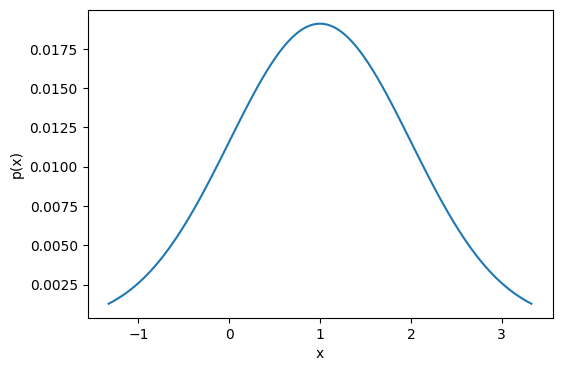

In [36]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, x_pdf / x_pdf.sum())
ax.set_xlabel('x')
ax.set_ylabel('p(x)');

(5 pts) Calculate the probability mass that the random variable X is less than 0, that is, Pr{X ≤ 0}

In [37]:
pr = stats.norm.cdf(0.0, loc=loc, scale=scale)
print(f"Probability that x < 0: {round(pr, 4)}")

Probability that x < 0: 0.1587


(C) (5 pts) Consider the new observation variable $z$, it gives information about the variable $x$ by the likelihood function $p(z|x) = N(z;x,σ^2)$, with variance $σ^2$ = 0.2. Apply the Bayes’ theorem to derive the posterior distribution, $p(x|z)$, given an observation $z$ = 0.75 and plot it. For a better comparison, plot the prior distribution, $p(x)$, too.

$$
p(x|z) = \frac{p(z|x) p(x)}{\int_x p(z|x)} = \frac{N(z; x, \sigma^2) N(x; 1, 1)}{\int_x N(z; x, \sigma^2)} =
\frac{N(0.75; x, \sigma^2) N(x; 1, 1)}{\int_x N(0.75; x, \sigma^2)}
$$

In [38]:
sigma = np.sqrt(0.2)
p_z_x = np.array([stats.norm.pdf(0.75, loc=x_, scale=sigma) for x_ in x])
denom = sum(p_z_x)

In [39]:
print(f"p(x) shape: {x_pdf.shape}")
print(f"p(z|x) shape: {p_z_x.shape}")
print(f"p(z) shape: {denom.shape}")

p(x) shape: (100,)
p(z|x) shape: (100,)
p(z) shape: ()


In [41]:
p_x_z = p_z_x * x_pdf / denom

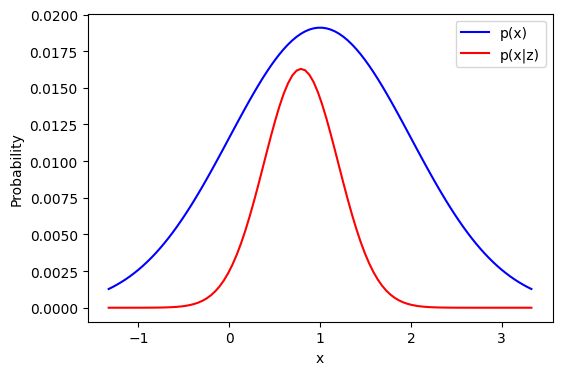

In [42]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, x_pdf / x_pdf.sum(), label="p(x)", color="blue")
ax.plot(x, p_x_z, label="p(x|z)", color="red")
ax.set_xlabel('x')
ax.set_ylabel('Probability');
ax.legend();

(D) Plot the joint probability density function $p(x, z)$

So here it is: $p(x, z) = p(z|x) p(x)$

In [43]:
p_joint = p_z_x * x_pdf

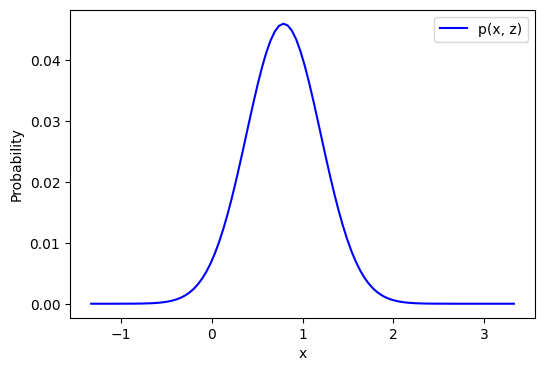

In [48]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, p_joint / p_joint.sum(), label="p(x, z)", color="blue")
ax.set_xlabel('x')
ax.set_ylabel('Probability');
ax.legend();

# Task 2 Multivariate Gaussian

(A) (10 pts) Write the function plot2dcov which plots the 2d contour given three core parameters: mean, covariance, and the iso-contour value k. You may add any other parameter such as color, number of points, etc.

In [98]:
def plot2dcov(mean, covariance, k=1.0, num_points=30, color='blue', ax=None):
    L = scipy.linalg.cholesky(covariance, lower=True)
    
    angles = np.linspace(0, 2 * np.pi, num_points)
    circle_points = k * np.vstack((np.cos(angles), np.sin(angles)))
    scaled_points = np.dot(L, circle_points)
    #scaled_points += mean[:, np.newaxis]
    scaled_points += mean
    
    # Plot contour
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(scaled_points[0], scaled_points[1], color=color)
    ax.scatter(mean[0], mean[1], color='red', marker='o')  # Plot mean point
    ax.set_title('2D Gaussian Contour')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_aspect('equal')
    ax.grid(True)
    return ax

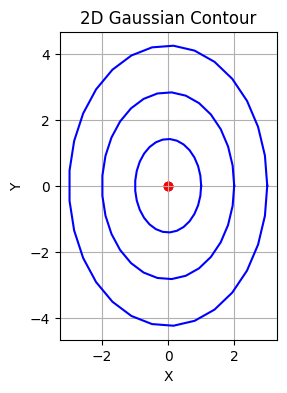

In [54]:
mean = np.array([0, 0])
covariance = np.array([
    [1, 0],
    [0, 2]
])

fig, ax = plt.subplots(figsize=(6, 4))
ax = plot2dcov(mean, covariance, k=1.0, num_points=30, color='blue', ax=ax)
ax = plot2dcov(mean, covariance, k=2.0, num_points=30, color='blue', ax=ax)
ax = plot2dcov(mean, covariance, k=3.0, num_points=30, color='blue', ax=ax)
plt.show()

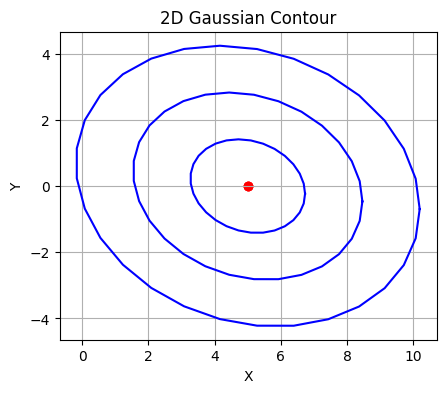

In [55]:
mean = np.array([5, 0])
covariance = np.array([
    [3, -0.4],
    [-0.4, 2]
])

fig, ax = plt.subplots(figsize=(6, 4))
ax = plot2dcov(mean, covariance, k=1.0, num_points=30, color='blue', ax=ax)
ax = plot2dcov(mean, covariance, k=2.0, num_points=30, color='blue', ax=ax)
ax = plot2dcov(mean, covariance, k=3.0, num_points=30, color='blue', ax=ax)
plt.show()

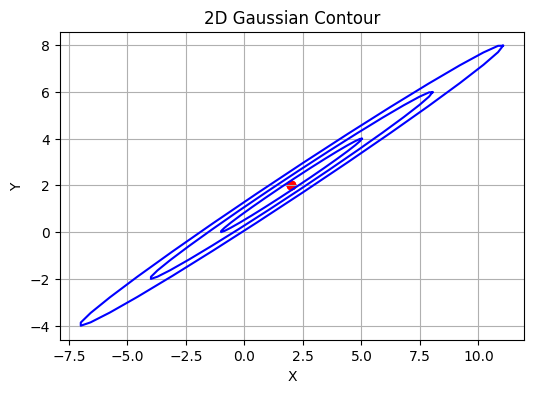

In [56]:
mean = np.array([2, 2])
covariance = np.array([
    [9.1, 6],
    [6, 4]
])

fig, ax = plt.subplots(figsize=(6, 4))
ax = plot2dcov(mean, covariance, k=1.0, num_points=30, color='blue', ax=ax)
ax = plot2dcov(mean, covariance, k=2.0, num_points=30, color='blue', ax=ax)
ax = plot2dcov(mean, covariance, k=3.0, num_points=30, color='blue', ax=ax)
plt.show()

(10 pts) Draw random samples from a multivariate normal distribution. You can use the python function that draws samples from the univariate normal distribution N (0, 1). In particular, draw and plot 200 samples
from N([2, 2], [1 1.3, [1.3, 3]]) ; also plot their corresponding 1-sigma iso-contour. Then, using the results from B, calculate the sample mean and covariance and plot again the 1-sigma iso-contour for the estimated Gaussian parameters. Run the experiment multiple times and try different number of samples. Comment on the results.

In [62]:
mean_usual = np.array([0, 0])
covariance_usual = np.array([
    [1, 0],
    [0, 1]
])
x1 = stats.norm.rvs(loc=mean_usual[0], scale=covariance_usual[0, 0], size=200)
x2 = stats.norm.rvs(loc=mean_usual[1], scale=covariance_usual[1, 1], size=200)

In [63]:
X = np.vstack((x1, x2))

In [66]:
X.shape

(2, 200)

In [67]:
b = np.array(
    [
        2,
        2
    ]
).reshape(2, 1)

In [68]:
cov = np.array([
    [1, 1.3],
    [1.3, 3]
])

In [69]:
A = np.linalg.cholesky(cov)

In [71]:
y = A @ X + b

In [73]:
y.mean(axis=1)

array([2.12073652, 2.21877765])

In [79]:
np.sqrt(((y.mean(axis=1) - b) ** 2).sum())

0.353386376389573

In [80]:
np.sqrt(((np.cov(y) - cov) ** 2).sum())

0.025154516266426525

# Task 3: Covariance Propagation (25 points)

a) Written in ipad

b) Draw the propagation state PDF (1-sigma iso-contour) for times indexes t = 0, . . . , 5 and the control u_t = [3, 0] for all time sequences. The PDF for the initial state is N((0, 0), [0.1, 0, 0, 0.1])

In [104]:
def propagation(x_current, v_current, delta_t=0.5, x_cov=None, v_cov=None, noise_cov=None):
    dim = x_current.shape[0]
    noise_dim = noise_cov.shape[0]
    
    if noise_cov is None:
        noise_cov = np.diag([0.1] * dim)
    noise = np.random.multivariate_normal([0] * dim, noise_cov, 1).reshape(-1 , 1)
    if x_cov is None:
        x_cov = np.identity(dim)
    if v_cov is None:
        v_cov = np.diag([delta_t] * dim)
    if noise_dim == dim:
        return  x_cov @ x_current + v_cov @ v_current + noise
    else:
        return  x_cov @ x_current + v_cov @ (v_current + noise)

In [57]:
const_cov = np.array([
    [0.1, 0],
    [0, 0.1]
])

In [58]:
x_init = np.random.multivariate_normal([0, 0], np.array([[0.1, 0], [0, 0.1]]), 1).reshape(-1 , 1)
x_curr = x_init
v_curr = np.array([3, 0]).reshape(2, 1)

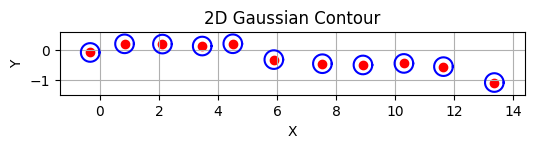

In [59]:
fig, ax = plt.subplots(figsize=(6, 4))
for iter in range(11):
    ax = plot2dcov(x_curr, const_cov, k=1.0, num_points=30, color='blue', ax=ax)
    x_curr = propagation(x_curr, v_curr)
plt.show()

с)

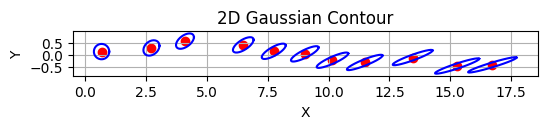

In [62]:
fig, ax = plt.subplots(figsize=(6, 4))
J = np.array([
    [1, 0.3],
    [0, 1]
])
cov_curr = const_cov
x_cov = np.array([
    [1, 0.3],
    [0, 1]
])

x_init = np.random.multivariate_normal([0, 0], np.array([[0.1, 0], [0, 0.1]]), 1).reshape(-1 , 1)
x_curr = x_init
v_curr = np.array([3, 0]).reshape(2, 1)

for iter in range(11):
    ax = plot2dcov(x_curr, cov_curr, k=1.0, num_points=30, color='blue', ax=ax)
    x_curr = propagation(x_curr, v_curr, x_cov=x_cov)
    cov_curr = J @ cov_curr @ J.T
ax.set_aspect('equal')
plt.show()

d)

In [99]:
x_init = np.random.multivariate_normal([0, 0, 0], np.array([[0.1, 0, 0], [0, 0.1, 0], [0, 0, 0.5]]), 1).reshape(-1 , 1)

In [100]:
x_init

array([[-0.69776926],
       [-0.40027891],
       [-0.71550188]])

In [101]:
dim = 3
x_cov = np.identity(dim)
delta_t = 0.5
v_cov_fn = lambda teta: np.array([
    [np.cos(teta) * delta_t, 0],
    [np.sin(teta) * delta_t, 0],
    [0, delta_t]
])
v_curr = np.array([3, 1.5]).reshape(-1, 1)
cov_curr = np.diag([0.2, 0.2, 0.1])
x_curr = x_init

The next question is: we have to linearize our function to be able to propagate covariance?
1. cos(theta) ~ 1 - \frac{x^2}{2}
2. sin(theta) ~ theta - \frac{x^3}{3}

In [102]:
J_fn = lambda theta: np.array([
    [1, 0, -theta * delta_t],
    [0, 1, 1 - theta**2 * delta_t],
    [0, 0, 1]
])

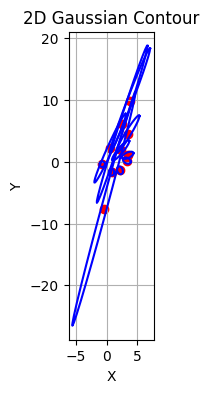

In [103]:
fig, ax = plt.subplots(figsize=(6, 4))
for iter in range(11):
    ax = plot2dcov(x_curr[:2], cov_curr[:2, :2], k=1.0, num_points=30, color='blue', ax=ax)
    x_curr = propagation(x_curr, v_curr, x_cov=x_cov, v_cov=v_cov_fn(x_curr[2].item()), noise_cov=cov_curr)
    J = J_fn(x_curr[2].item())
    cov_curr = J @ cov_curr @ J.T
ax.set_aspect('equal')
plt.show()

e)

In [107]:
x_init = np.random.multivariate_normal([0, 0, 0], np.array([[0.1, 0, 0], [0, 0.1, 0], [0, 0, 0.5]]), 1).reshape(-1 , 1)
x_init

array([[-0.51964979],
       [-0.14060116],
       [ 0.55709648]])

In [108]:
dim = 3
x_cov = np.identity(dim)
delta_t = 0.5
v_cov_fn = lambda teta: np.array([
    [np.cos(teta) * delta_t, 0],
    [np.sin(teta) * delta_t, 0],
    [0, delta_t]
])
v_curr = np.array([3, 1.5]).reshape(-1, 1)
cov_curr = np.diag([2, 0.1])
x_curr = x_init

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
for iter in range(11):
    ax = plot2dcov(x_curr[:2], cov_curr[:2, :2], k=1.0, num_points=30, color='blue', ax=ax)
    x_curr = propagation(x_curr, v_curr, x_cov=x_cov, v_cov=v_cov_fn(x_curr[2].item()), noise_cov=cov_curr)
    J = J_fn(x_curr[2].item())
    cov_curr = J @ cov_curr @ J.T
ax.set_aspect('equal')
plt.show()

Hm, now the derivation will be different. Not hard to solve, but may skip for now.